# CODING TASK #1: IMPORT KEY LIBRARIES/DATASETS, PERFORM BASIC EDA AND PREP THE DATA FOR TRAINING

In [1]:
# Import Numpy and check the version
import numpy as np
print(np.__version__)

1.21.6


In [2]:
# Import Numpy and check the version
import pandas as pd
print(pd.__version__)

1.3.5


In [3]:
# Updgrade Numpy version
!pip3 install numpy --upgrade

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [4]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization

In [6]:
# Read the CSV file 
university_df = pd.read_csv("university_admission.csv")

In [7]:
# Load the top 6 instances
university_df.head(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90


In [8]:
# Load the bottom 6 instances 
university_df.tail(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
994,301,99,3,2.5,2.0,8.45,1,0.68
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73
999,327,113,4,4.5,4.5,9.04,0,0.84


In [9]:
# Display the feature columns
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [10]:
# Check the shape of the dataframe
university_df.shape

(1000, 8)

In [11]:
# Check if any missing values are present in the dataframe
university_df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

In [12]:
university_df = university_df.dropna()

In [13]:
university_df.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_Rating        int64
SOP                    float64
LOR                    float64
CGPA                   float64
Research                 int64
Chance_of_Admission    float64
dtype: object

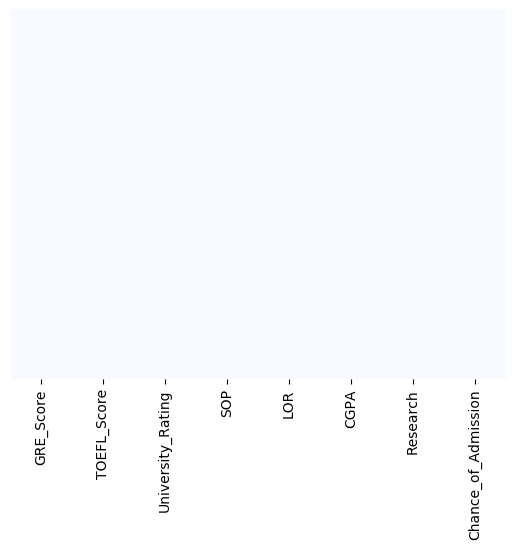

In [15]:
# check if there are any Null values
sns.heatmap(university_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

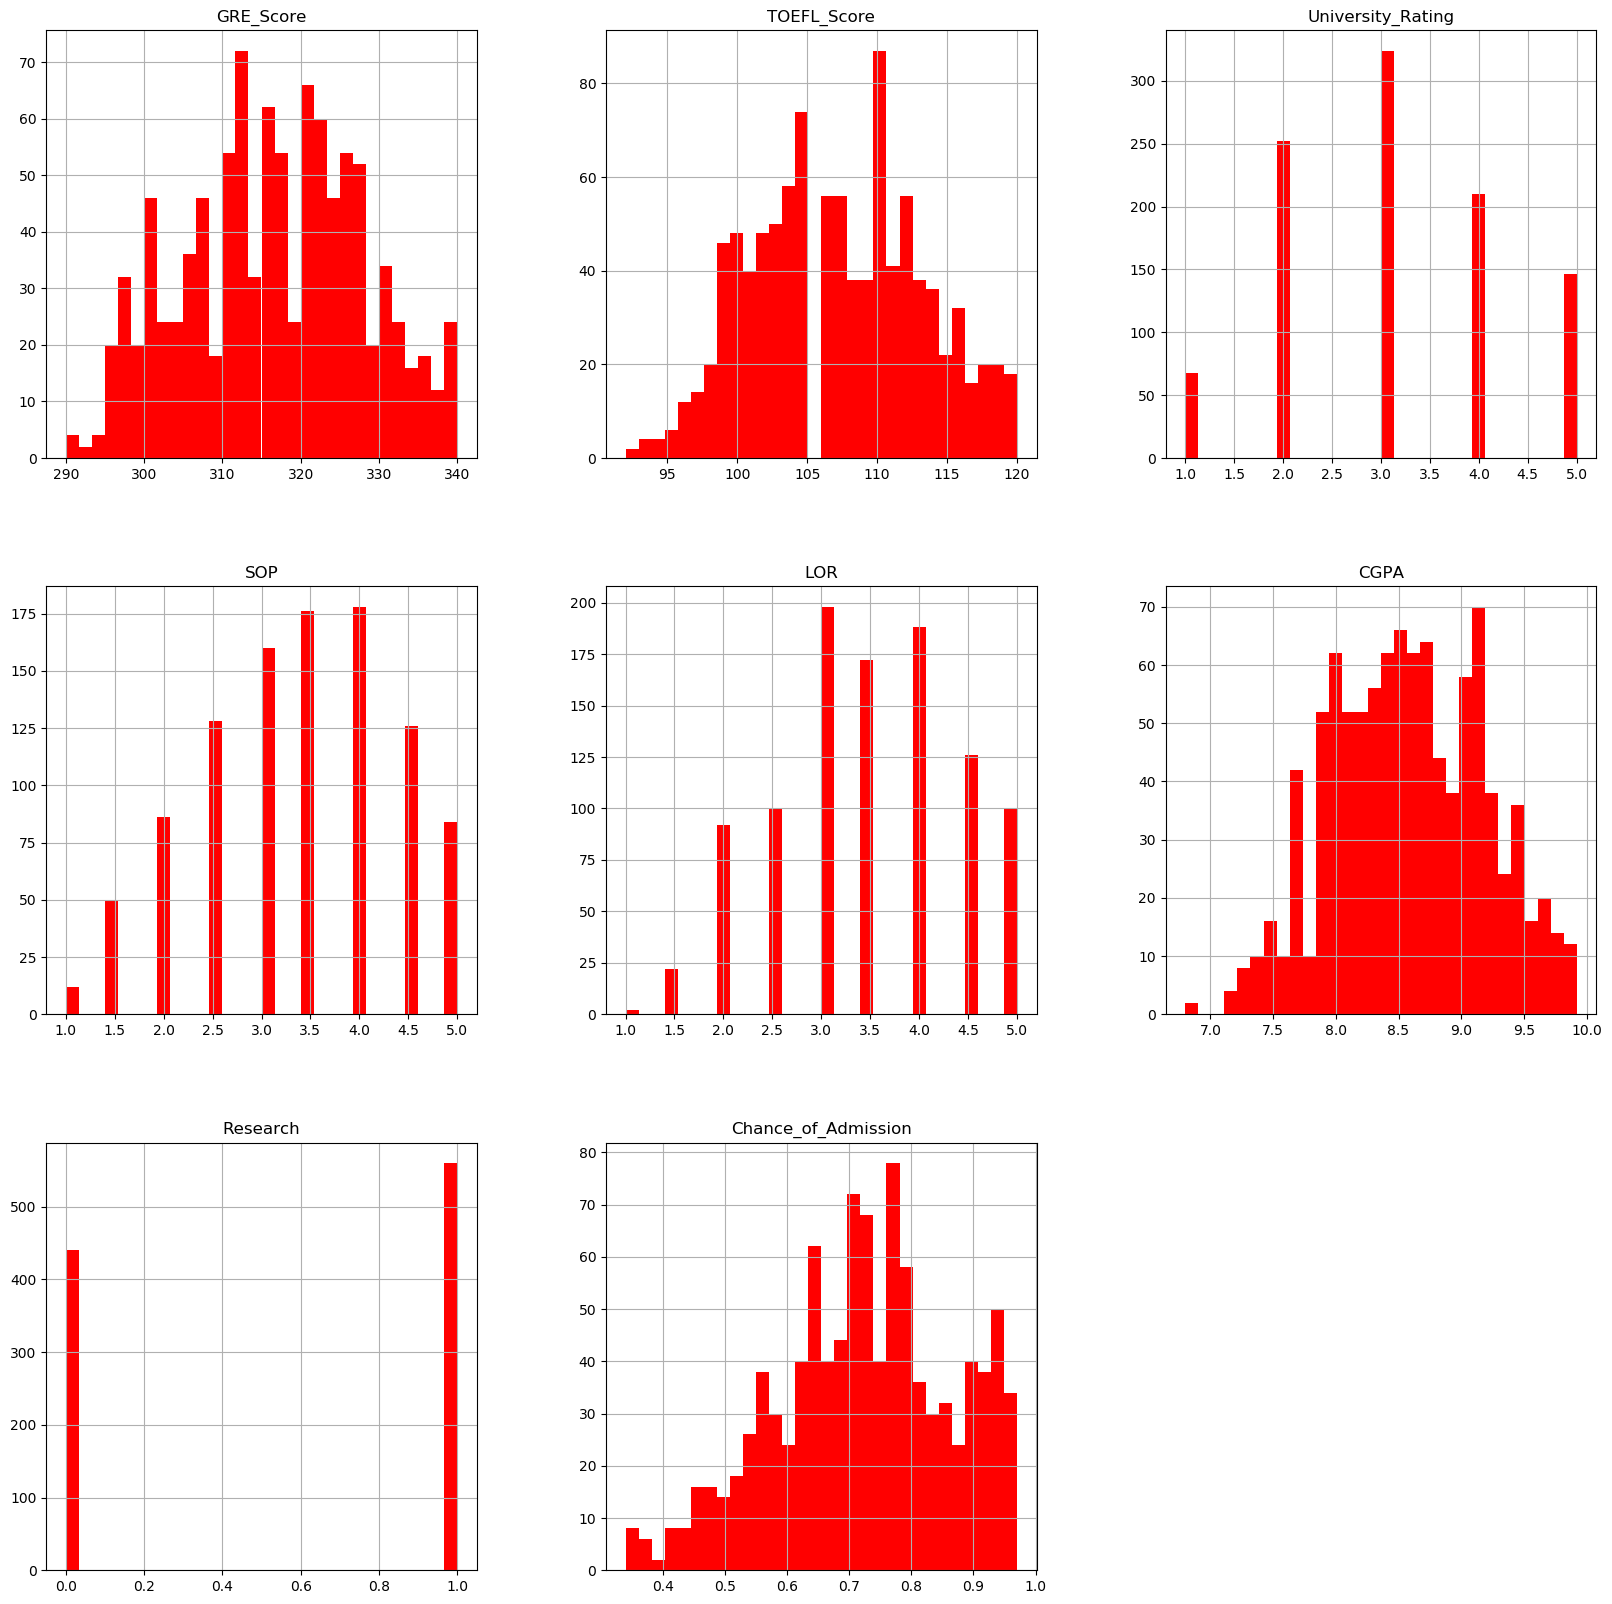

In [16]:
university_df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

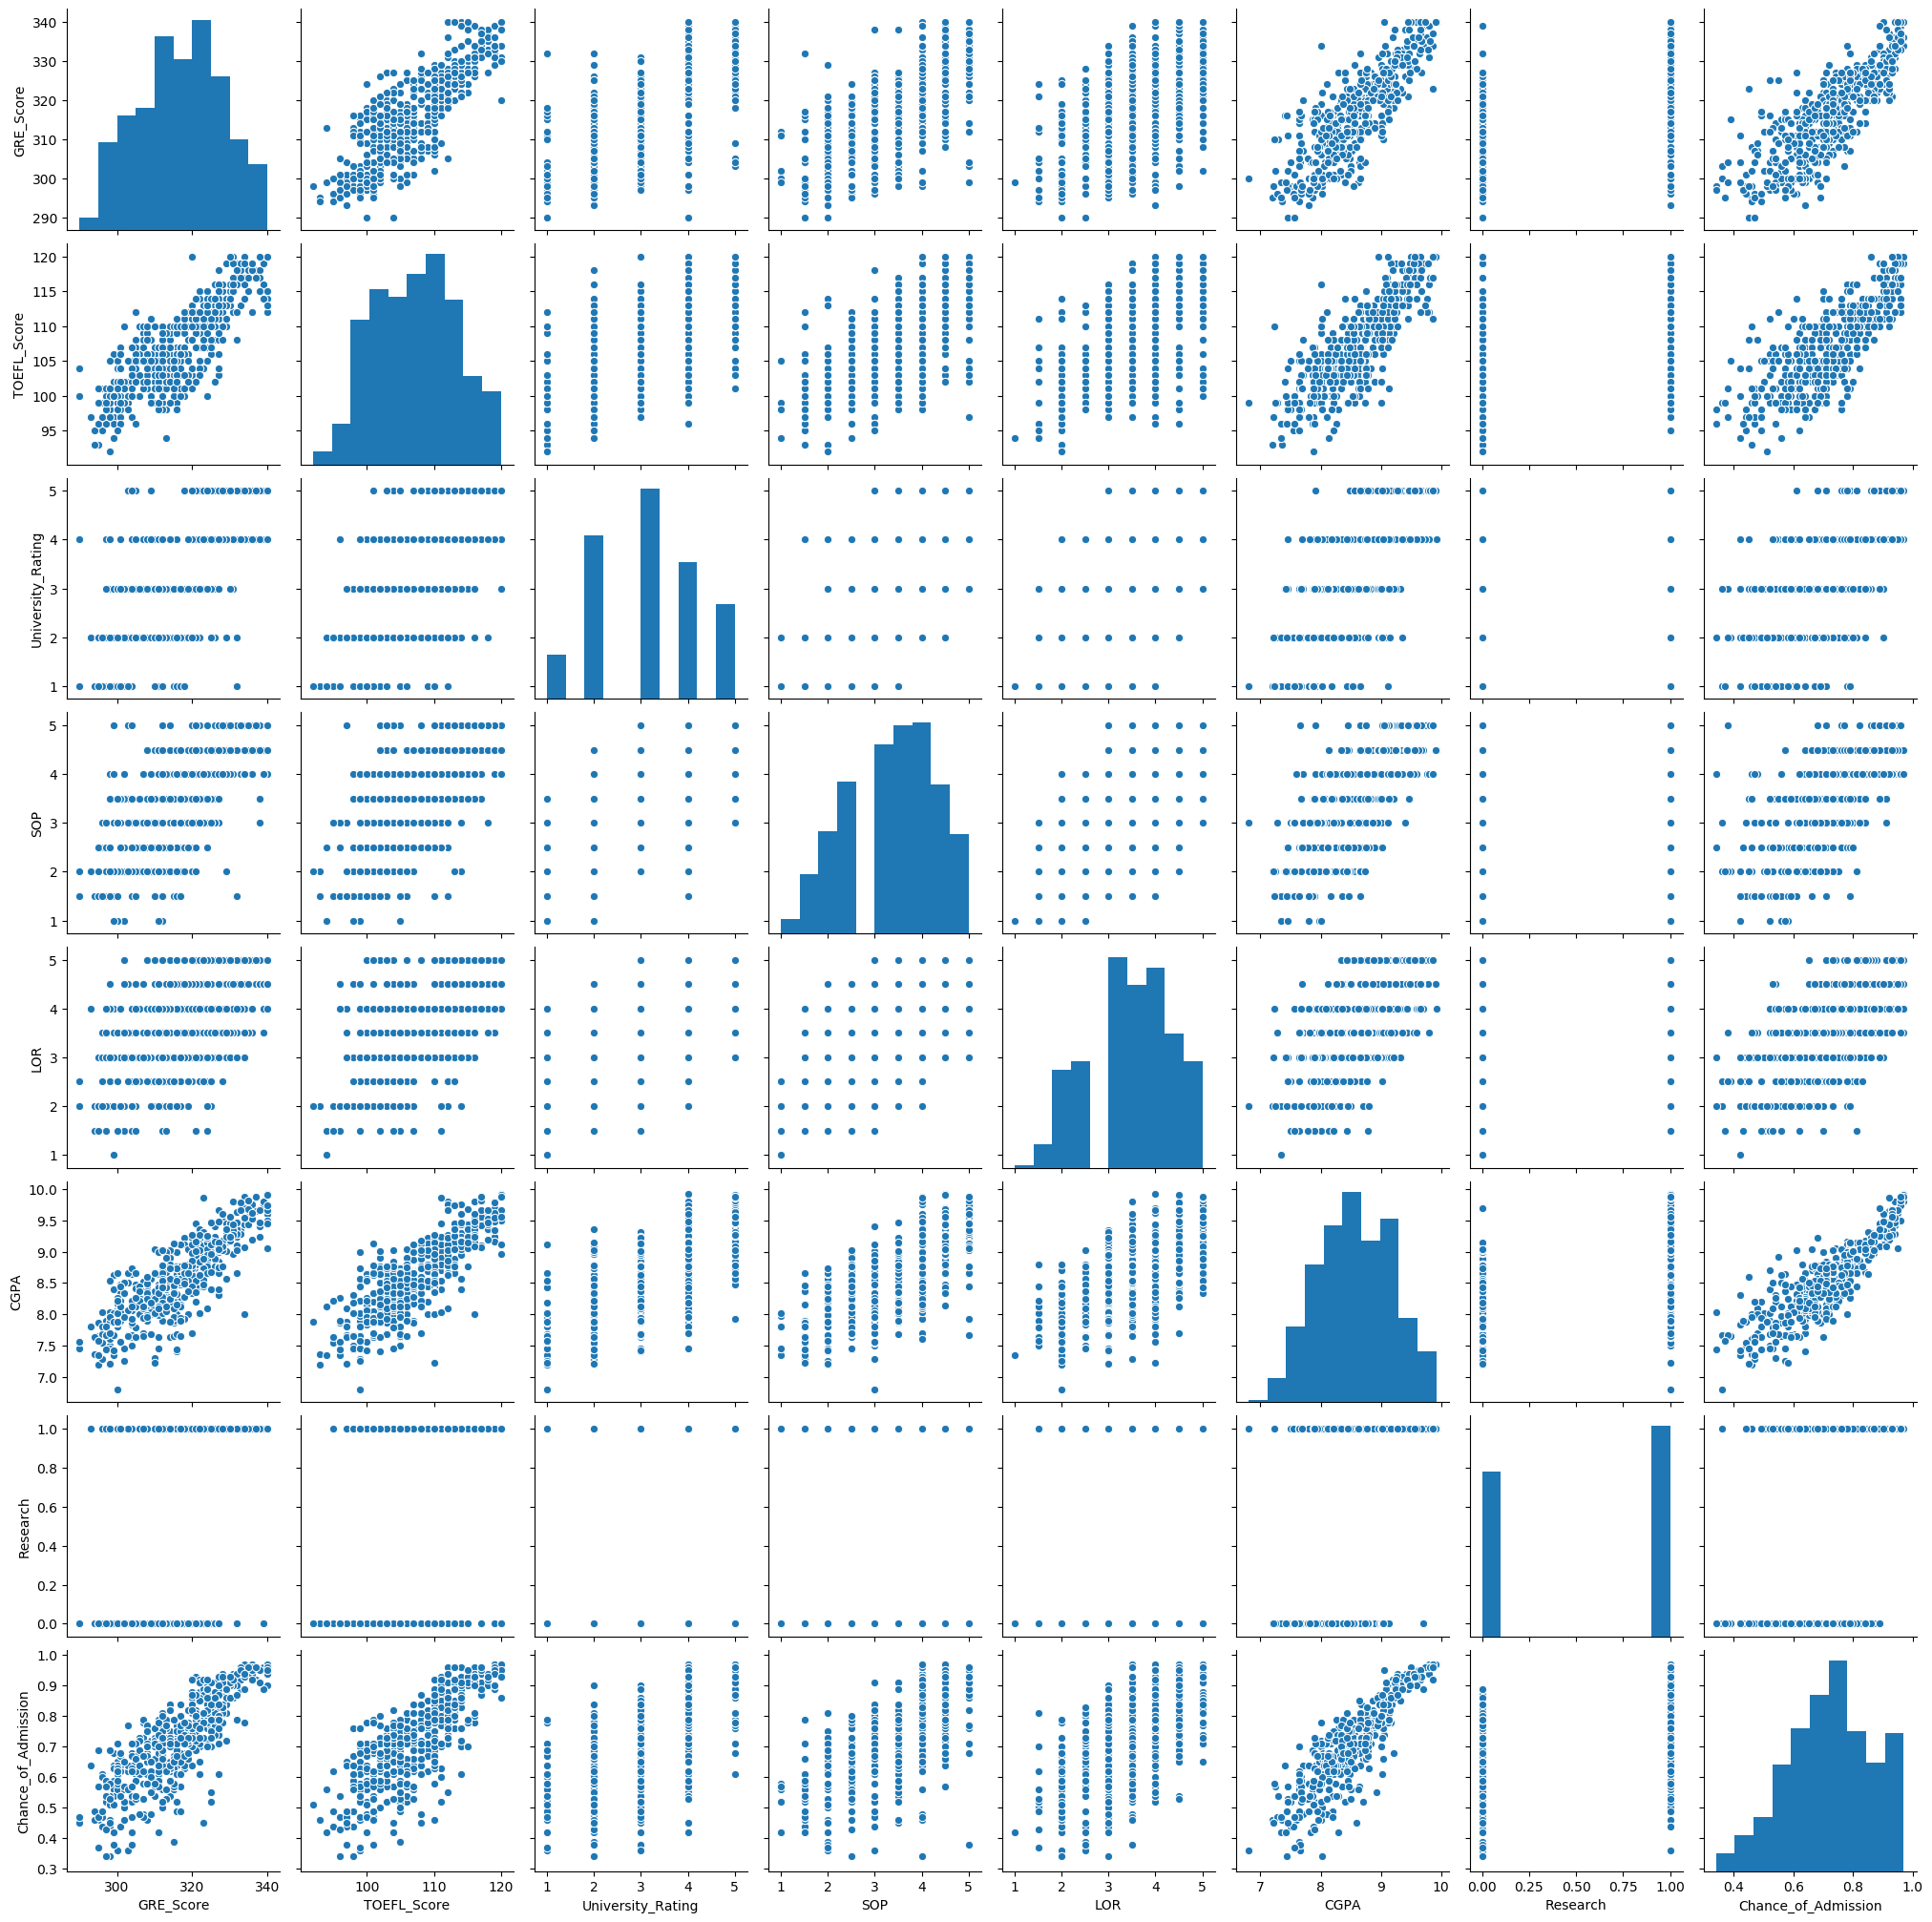

In [17]:
sns.pairplot(university_df)
plt.show()

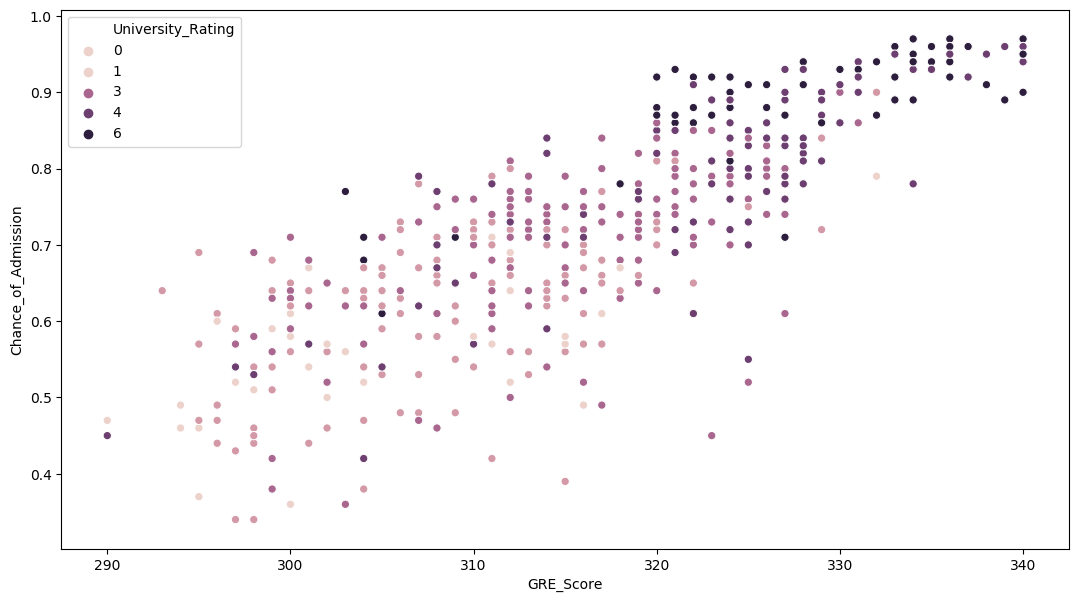

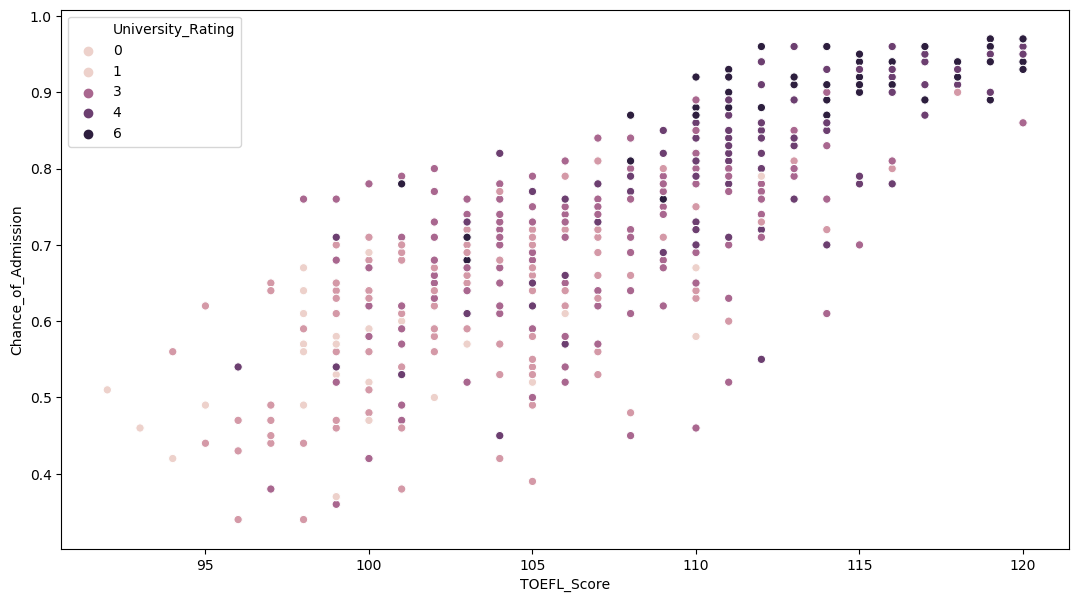

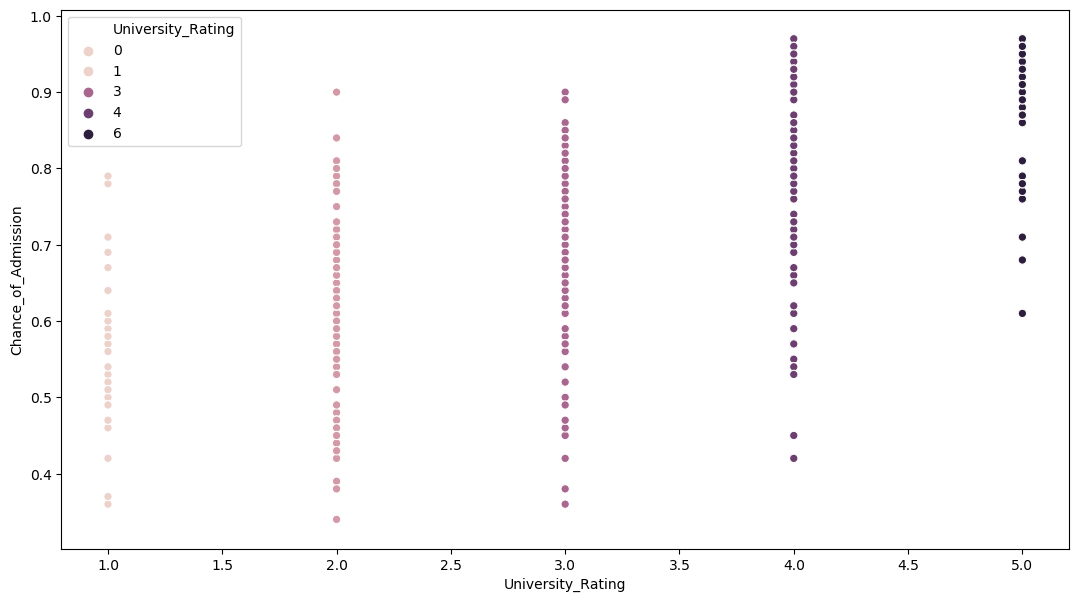

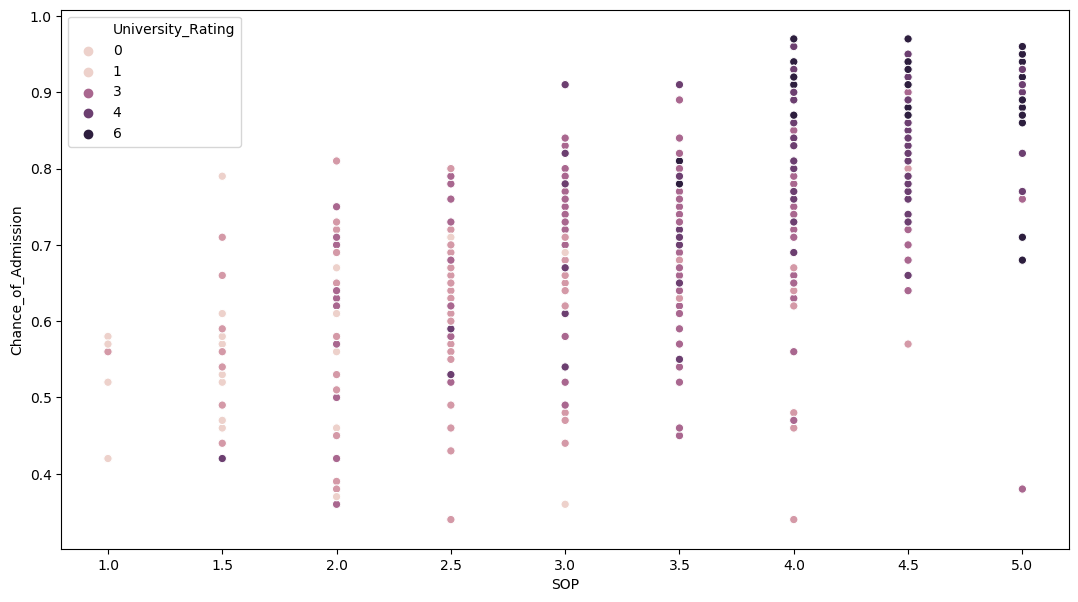

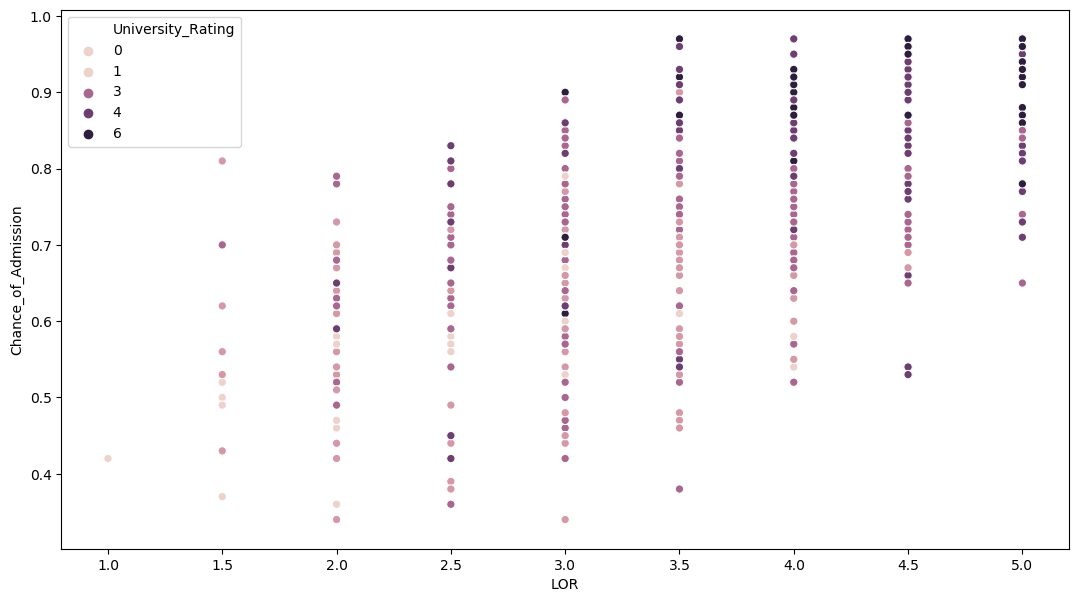

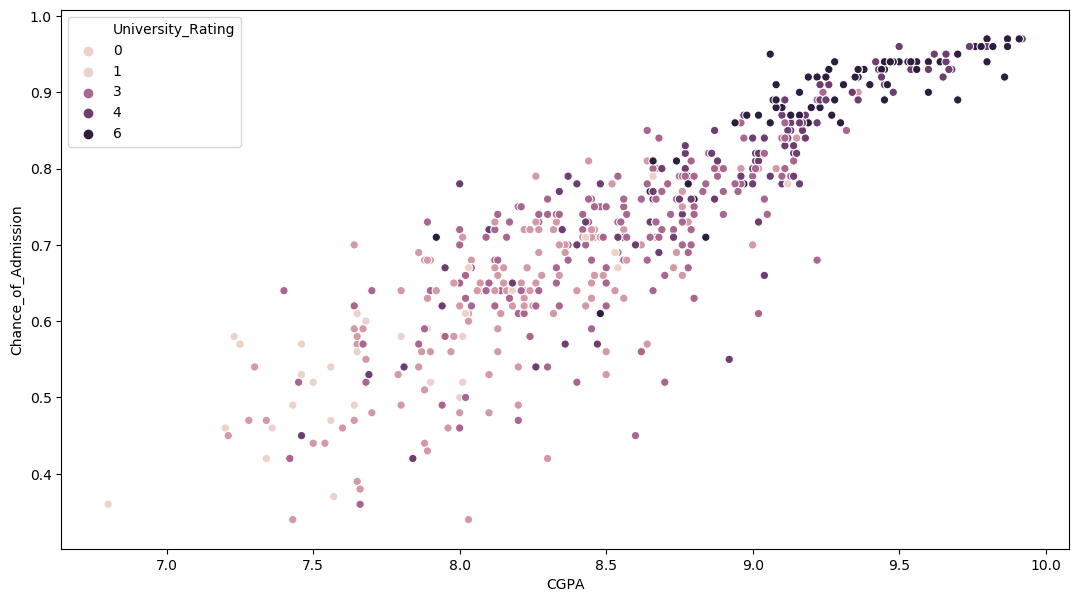

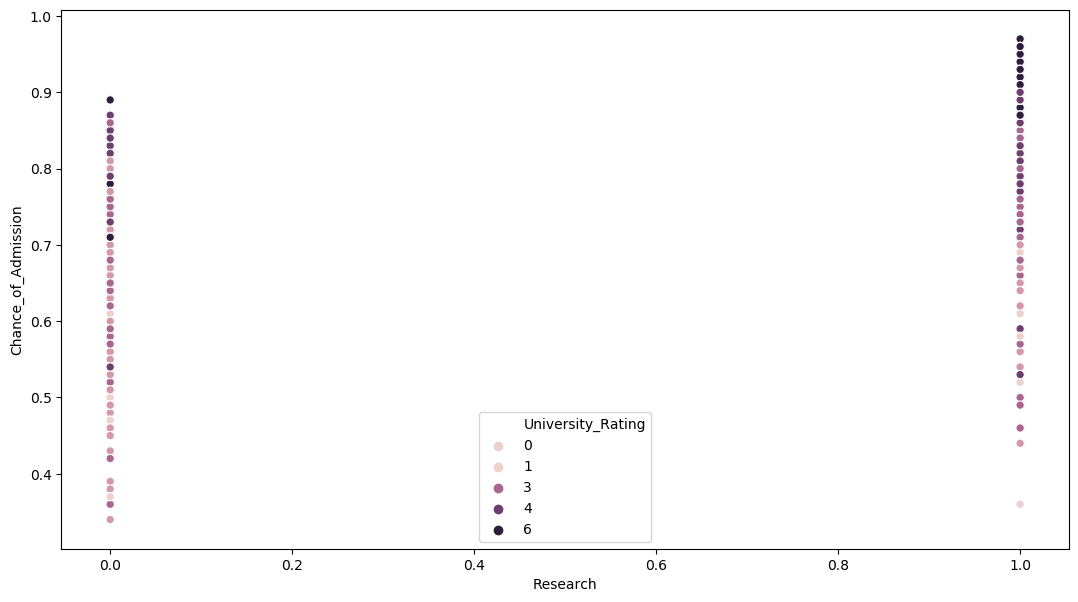

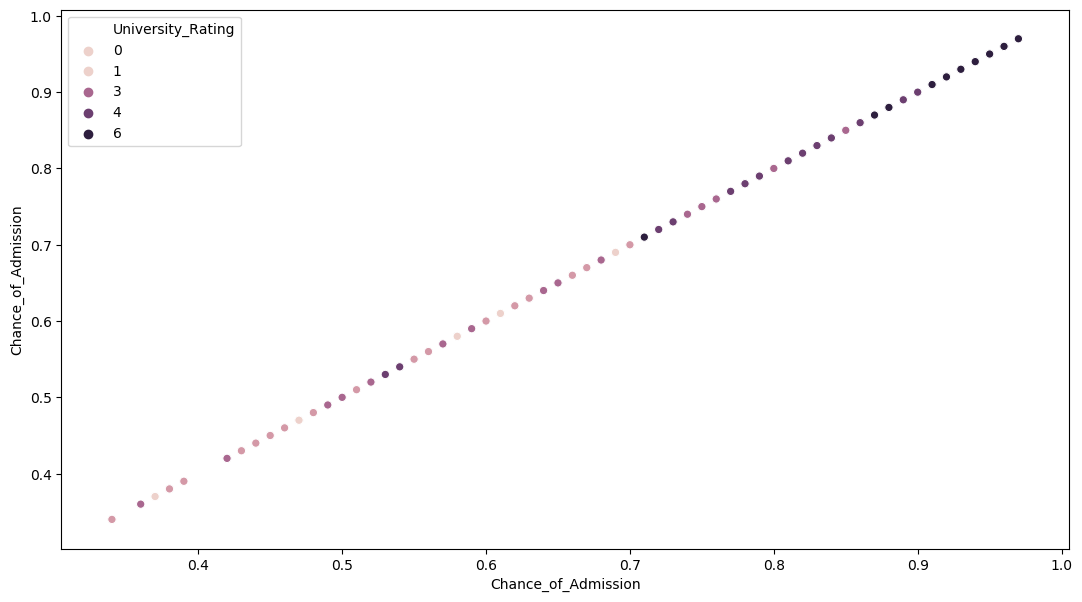

In [18]:
for i in university_df.columns:
    
  plt.figure(figsize = (13, 7))
  sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = university_df)
  plt.show()

In [19]:
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [20]:
X = university_df.drop(columns = ['Chance_of_Admission'])

In [21]:
y = university_df['Chance_of_Admission']

In [22]:
X.shape

(1000, 7)

In [23]:
y.shape

(1000,)

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
y.shape

(1000, 1)

# CODING TASK #2: TRAIN AN XG-BOOST ALGORITHM IN SAGEMAKER (PART 1)

In [26]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [27]:
X_train.shape

(600, 7)

In [28]:
X_test.shape

(200, 7)

In [29]:
X_val.shape

(200, 7)

In [30]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [31]:
train_data.head()

,Target,0,1,2,3,4,5,6
0,0.64,313.0,102.0,3.0,2.0,3.0,8.27,0.0
1,0.62,311.0,101.0,3.0,2.0,2.5,7.64,1.0
2,0.89,329.0,113.0,5.0,5.0,4.5,9.45,1.0
3,0.76,322.0,109.0,5.0,4.5,3.5,8.80,0.0
4,0.58,308.0,106.0,3.0,3.0,3.0,8.24,0.0


In [32]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [33]:
val_data.head()

,Target,0,1,2,3,4,5,6
0,0.95,333.0,117.0,4.0,5.0,4.0,9.66,1.0
1,0.70,324.0,111.0,3.0,2.5,1.5,8.79,1.0
2,0.71,316.0,111.0,4.0,4.0,5.0,8.54,0.0
3,0.67,318.0,109.0,3.0,3.0,3.0,8.50,0.0
4,0.76,327.0,106.0,4.0,4.0,4.5,8.75,1.0


In [34]:
val_data.shape

(200, 8)

In [35]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [36]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
# Roles give learning and hosting access to the data
# This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [37]:
print(role)

arn:aws:iam::971421653261:role/service-role/AmazonSageMaker-ExecutionRole-20220323T130903


In [38]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-971421653261/XGBoost-Regressor/train/XGBoost-Regressor


In [39]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-us-east-1-971421653261/XGBoost-Regressor/validation/XGBoost-Regressor


In [40]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-1-971421653261/XGBoost-Regressor/output


# CODING TASK #3: TRAIN AN XG-BOOST ALGORITHM IN SAGEMAKER (PART 2)

In [41]:
boto3.Session().region_name

'us-east-1'

In [42]:
!pip install --upgrade pip

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [ ]:
# !pip install -U sagemaker

In [43]:
# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')
# container = sagemaker.image_uris.retrieve("xgboost", 'latest')


# This is using the old AWS SageMAker SDK 1.0 (You need to use get_image_uri and note that attribute order is different as well)
# from sagemaker.amazon.amazon_estimator import get_image_uri
# container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

In [60]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.
# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.
# colsample_by_tree: fraction of features that will be used to train each tree.
# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor.set_hyperparameters(max_depth = 6,
                           objective = 'reg:squarederror',
                           colsample_bytree = 0.3,
                           alpha = 2,
                           eta = 0.05,
                           num_round = 200)



In [61]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'csv', s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type = 'csv', s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor.fit(data_channels)

2022-04-30 03:57:25 Starting - Starting the training job...
2022-04-30 03:57:51 Starting - Preparing the instances for trainingProfilerReport-1651291045: InProgress
.........
2022-04-30 03:59:26 Downloading - Downloading input data...
2022-04-30 03:59:46 Training - Downloading the training image......
2022-04-30 04:00:56 Uploading - Uploading generated training model.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[04:00:50] 600x7 matrix with 4200 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delim

# CODING TASK #4: DEPLOY THE MODEL TO MAKE PREDICTIONS

In [62]:
predictor = Xgboost_regressor.deploy(initial_instance_count = 1, instance_type = "ml.m4.xlarge")

------!

In [63]:
predictor.endpoint_name

'sagemaker-xgboost-2022-04-30-04-02-14-542'

In [64]:
from sagemaker.predictor import csv_serializer, json_deserializer
predictor.serializer = csv_serializer

In [65]:
X_test

array([[305.  , 104.  ,   2.  , ...,   1.5 ,   7.79,   0.  ],
       [302.  ,  99.  ,   2.  , ...,   2.  ,   7.97,   0.  ],
       [323.  , 110.  ,   4.  , ...,   5.  ,   8.88,   1.  ],
       ...,
       [316.  , 107.  ,   2.  , ...,   3.5 ,   8.64,   1.  ],
       [324.  , 111.  ,   5.  , ...,   4.  ,   9.16,   1.  ],
       [297.  ,  99.  ,   4.  , ...,   3.5 ,   7.81,   0.  ]])

In [66]:
predictions = predictor.predict(X_test)
predictions

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


b'0.5417328476905823,0.538237988948822,0.8173947930335999,0.6827690601348877,0.6444410085678101,0.6530421376228333,0.6866725087165833,0.8967629671096802,0.6560628414154053,0.5479373335838318,0.5917172431945801,0.812651515007019,0.6334060430526733,0.6369966864585876,0.6391273736953735,0.817805290222168,0.8090505003929138,0.852123498916626,0.5092038512229919,0.6843287944793701,0.5663853287696838,0.6082419157028198,0.6861661672592163,0.6787292957305908,0.8620686531066895,0.9078541994094849,0.5852440595626831,0.8906526565551758,0.6779778599739075,0.9078541994094849,0.6520237326622009,0.6310784220695496,0.6360421776771545,0.6718178987503052,0.840661883354187,0.6717309355735779,0.8967629671096802,0.7907036542892456,0.5507127642631531,0.6932898163795471,0.7238346338272095,0.7260909676551819,0.834057092666626,0.5215317010879517,0.6368592977523804,0.8531655073165894,0.8598790764808655,0.6986952424049377,0.5301962494850159,0.7911040782928467,0.6366637945175171,0.7942143082618713,0.91056084632873

In [67]:
predicted_values = bytes_2_array(predictions)

In [68]:
predicted_values.shape

(200, 1)

In [69]:
predicted_values

array([[0.54173285],
       [0.538238  ],
       [0.8173948 ],
       [0.68276906],
       [0.644441  ],
       [0.65304214],
       [0.6866725 ],
       [0.89676297],
       [0.65606284],
       [0.54793733],
       [0.59171724],
       [0.8126515 ],
       [0.63340604],
       [0.6369967 ],
       [0.6391274 ],
       [0.8178053 ],
       [0.8090505 ],
       [0.8521235 ],
       [0.50920385],
       [0.6843288 ],
       [0.5663853 ],
       [0.6082419 ],
       [0.68616617],
       [0.6787293 ],
       [0.86206865],
       [0.9078542 ],
       [0.58524406],
       [0.89065266],
       [0.67797786],
       [0.9078542 ],
       [0.65202373],
       [0.6310784 ],
       [0.6360422 ],
       [0.6718179 ],
       [0.8406619 ],
       [0.67173094],
       [0.89676297],
       [0.79070365],
       [0.55071276],
       [0.6932898 ],
       [0.72383463],
       [0.72609097],
       [0.8340571 ],
       [0.5215317 ],
       [0.6368593 ],
       [0.8531655 ],
       [0.8598791 ],
       [0.698

In [70]:
y_test.shape

(200, 1)

In [71]:
y_test

array([[0.53],
       [0.56],
       [0.81],
       [0.56],
       [0.76],
       [0.64],
       [0.73],
       [0.9 ],
       [0.64],
       [0.67],
       [0.46],
       [0.79],
       [0.69],
       [0.72],
       [0.62],
       [0.84],
       [0.84],
       [0.86],
       [0.51],
       [0.59],
       [0.68],
       [0.71],
       [0.64],
       [0.64],
       [0.88],
       [0.92],
       [0.48],
       [0.97],
       [0.69],
       [0.93],
       [0.72],
       [0.64],
       [0.59],
       [0.7 ],
       [0.79],
       [0.71],
       [0.9 ],
       [0.76],
       [0.54],
       [0.68],
       [0.68],
       [0.71],
       [0.87],
       [0.59],
       [0.65],
       [0.9 ],
       [0.86],
       [0.84],
       [0.36],
       [0.84],
       [0.81],
       [0.78],
       [0.96],
       [0.89],
       [0.76],
       [0.93],
       [0.97],
       [0.97],
       [0.43],
       [0.82],
       [0.5 ],
       [0.71],
       [0.73],
       [0.71],
       [0.73],
       [0.85],
       [0.

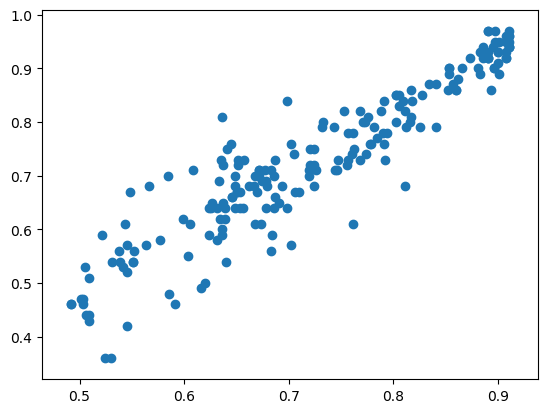

In [72]:
plt.scatter(predicted_values, y_test)
plt.show()

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.055 
MSE = 0.0029843239630582335 
MAE = 0.0412819502711296 
R2 = 0.8557070589587965 
Adjusted R2 = 0.8504463788166693


In [74]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    # same thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [59]:
# Delete the end-point
predictor.delete_endpoint()

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**  
- **Retrain the XG-Boost algorithm with different hyperparameters** 
- **Report any improvement or degradation in results.**

# FINAL END-OF-DAY CAPSTONE PROJECT

- In this hands-on project, we will train an XG-Boost regression model to predict life expectancy using built-in SageMaker Algorithms.
- This data was initially obtained from World Health Organization (WHO) and United Nations Website. Data contains features like year, status, life expectancy, adult mortality, infant deaths, percentage of expenditure, alcohol etc.
- Tasks:
    - Split the data into training, validation, testing and upload it to S3
    - Train a regression model using built-in SageMaker XG-boost algorithm 
    - Assess trained model performance
    - Plot trained model predictions vs. ground truth output
    - What is R2?

# EXCELLENT JOB!

# FINAL END-OF-DAY CAPSTONE PROJECT SOLUTION

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
# read the csv file 
life_expectancy_df = pd.read_csv('Life_Expectancy_Data.csv')

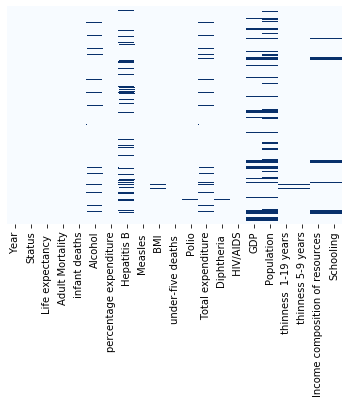

In [77]:
# check if there are any Null values
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [78]:
# Check the dataframe info
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [79]:
# Statistical summary of the dataframe
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


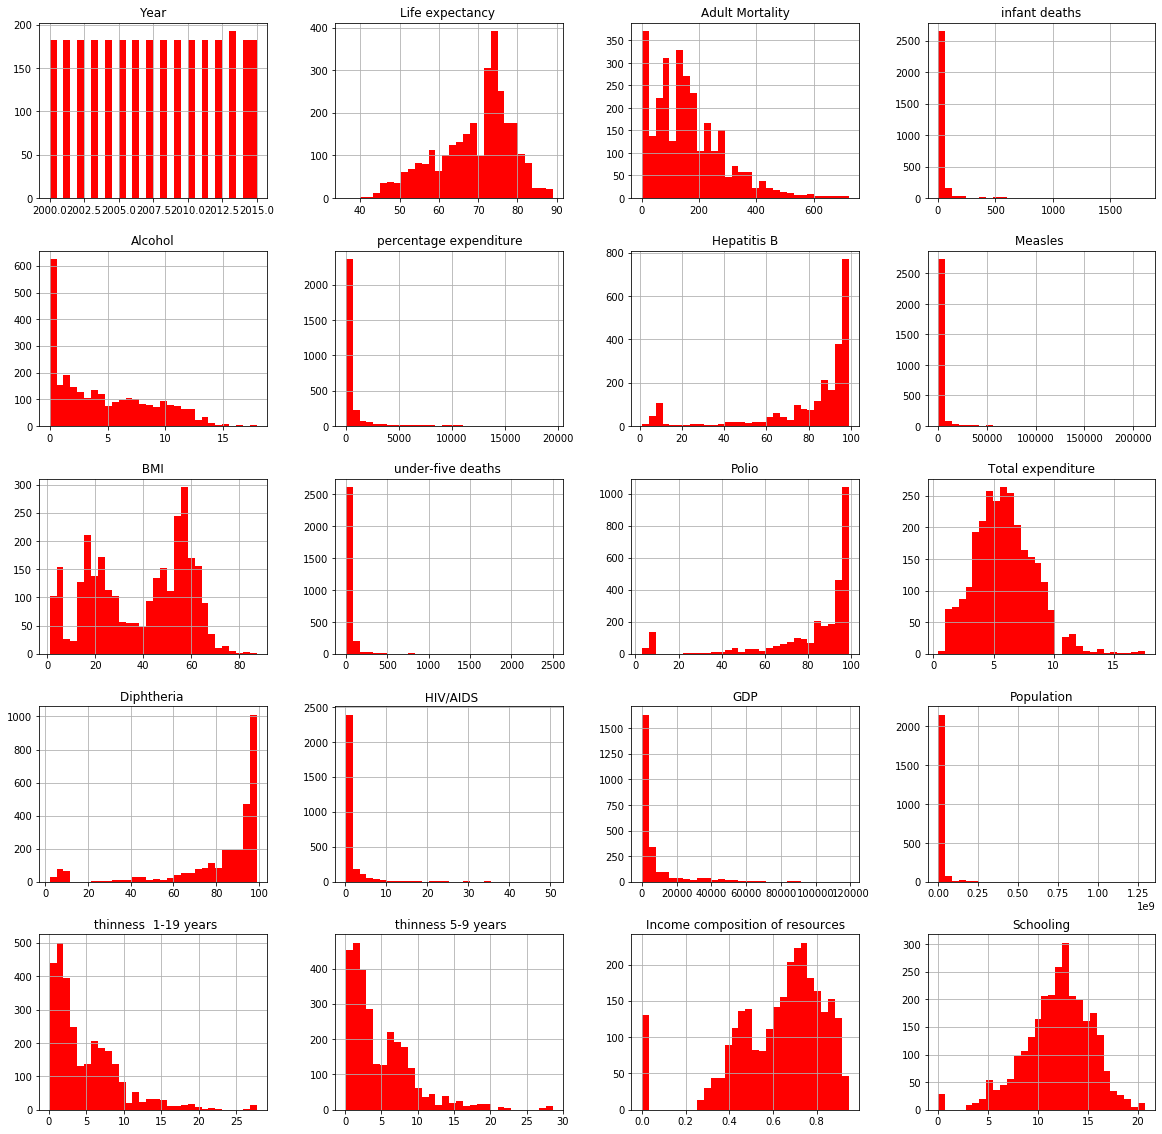

In [80]:
# Plot the histogram
life_expectancy_df.hist(bins = 30, figsize = (20, 20), color = 'r');


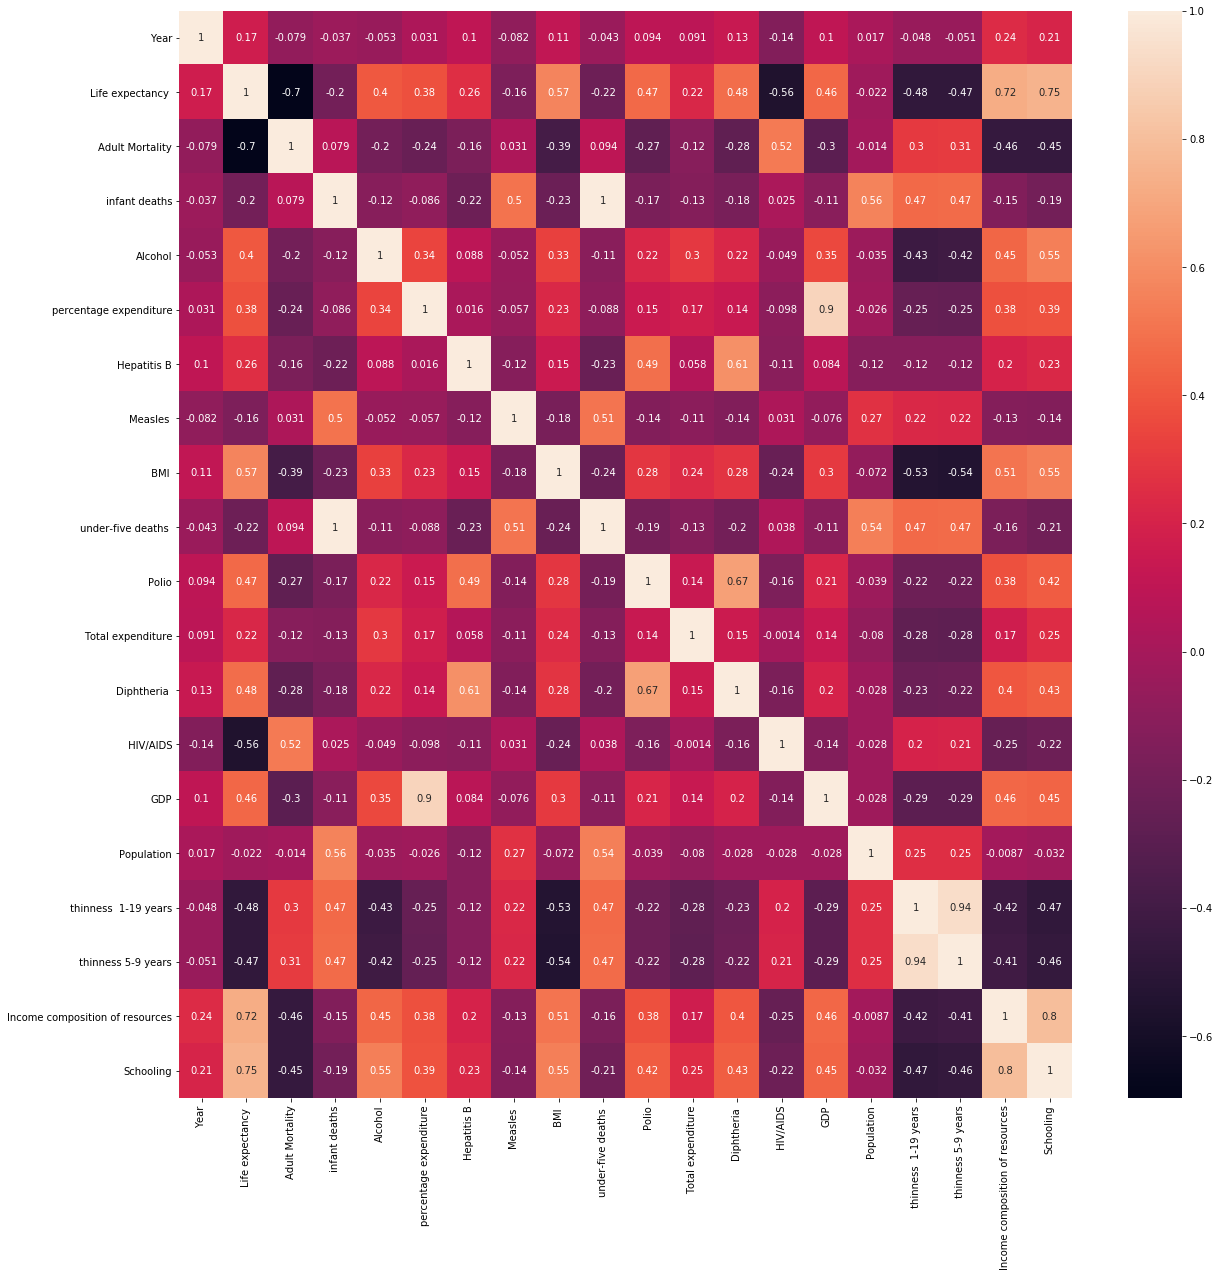

In [81]:
# Plot the correlation matrix

plt.figure(figsize = (20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [82]:
life_expectancy_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [83]:
# Perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'])

In [85]:
life_expectancy_df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [84]:
# Check the number of null values for the columns having null values
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]


Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [86]:
# Since most of the are continous values we fill them with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [87]:
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

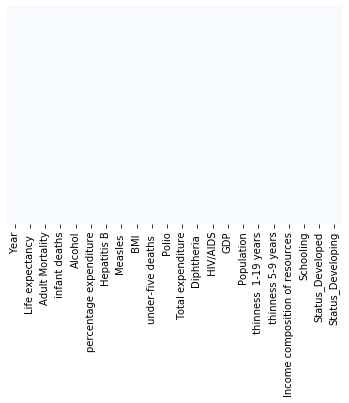

In [88]:
# check if there are any Null values
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [89]:
# Create train and test data

X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']]


In [90]:
# Convert the data type to float32

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [91]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [92]:
X_train.shape

(2056, 21)

In [93]:
X_test.shape

(441, 21)

In [94]:
X_val.shape

(441, 21)

In [95]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [96]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,82.000000,2014.0,66.0,1.0,0.01,0.000000,99.0,442.0,31.200001,2.0,...,99.0,0.1,7483.158691,12753375.0,1.5,1.0,0.627551,11.992793,0.0,1.0
1,72.699997,2001.0,144.0,4.0,0.53,210.241699,95.0,2198.0,27.000000,5.0,...,96.0,0.1,3915.115479,2369897.0,9.7,9.4,0.725000,11.900000,0.0,1.0
2,63.000000,2013.0,328.0,29.0,2.41,20.623062,79.0,35.0,22.299999,42.0,...,79.0,4.8,185.793365,1515321.0,6.4,6.2,0.565000,12.500000,0.0,1.0
3,69.900002,2008.0,185.0,0.0,6.41,1902.692993,9.0,0.0,4.200000,0.0,...,9.0,0.3,21188.119141,1315372.0,6.1,6.4,0.767000,12.400000,0.0,1.0
4,54.799999,2000.0,321.0,88.0,0.01,10.424960,62.0,6532.0,12.200000,122.0,...,24.0,0.1,114.559998,293756.0,2.3,2.5,0.338000,5.500000,0.0,1.0


In [97]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [98]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,73.300003,2009.0,118.0,4.0,0.59,668.744751,98.0,0.0,6.900000,4.0,...,98.0,0.100000,3492.139648,6821116.0,3.8,3.8,0.742,13.6,0.0,1.0
1,75.500000,2014.0,12.0,0.0,1.13,0.000000,97.0,116.0,59.700001,0.0,...,95.0,0.100000,7483.158691,12753375.0,2.2,2.2,0.743,12.9,0.0,1.0
2,78.099998,2007.0,14.0,1.0,4.13,750.714783,93.0,0.0,55.400002,1.0,...,93.0,0.100000,5184.494141,12753375.0,3.4,3.2,0.754,16.0,0.0,1.0
3,61.700001,2009.0,31.0,2.0,8.64,52.310863,79.0,0.0,33.000000,3.0,...,76.0,8.000000,763.662231,1586754.0,6.7,6.5,0.652,12.4,0.0,1.0
4,46.400002,2002.0,587.0,3.0,5.52,131.042130,88.0,37.0,26.700001,4.0,...,85.0,49.900002,1324.996216,1893.0,8.6,8.8,0.502,9.2,0.0,1.0


In [99]:
val_data.shape

(441, 22)

In [100]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [101]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
# Roles give learning and hosting access to the data
# This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [102]:
print(role)

arn:aws:iam::971421653261:role/service-role/AmazonSageMaker-ExecutionRole-20220323T130903


In [103]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-971421653261/XGBoost-Regressor/train/XGBoost-Regressor


In [104]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-us-east-1-971421653261/XGBoost-Regressor/validation/XGBoost-Regressor


In [105]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-1-971421653261/XGBoost-Regressor/output


In [106]:
boto3.Session().region_name

'us-east-1'

In [ ]:
# !pip install -U sagemaker

In [107]:
# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')
# container = sagemaker.image_uris.retrieve("xgboost", 'latest')


# This is using the old AWS SageMAker SDK 1.0 (You need to use get_image_uri and note that attribute order is different as well)
# from sagemaker.amazon.amazon_estimator import get_image_uri
# container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

In [108]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.
# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.
# colsample_by_tree: fraction of features that will be used to train each tree.
# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor.set_hyperparameters(max_depth = 5,
                           objective = 'reg:squarederror',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100)



In [109]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor.fit(data_channels)

2022-04-30 05:11:43 Starting - Starting the training job...
2022-04-30 05:12:10 Starting - Preparing the instances for trainingProfilerReport-1651295503: InProgress
.........
2022-04-30 05:13:37 Downloading - Downloading input data...
2022-04-30 05:14:08 Training - Downloading the training image......
2022-04-30 05:15:08 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[05:15:13] 2056x21 matrix with 43176 entries loaded from /opt/ml/input/data/train?format=

In [110]:
# Deploy the model
predictor = Xgboost_regressor.deploy(initial_instance_count = 1, instance_type = "ml.m4.xlarge")

---------!

In [111]:
predictor.endpoint_name

'sagemaker-xgboost-2022-04-30-05-17-21-248'

In [112]:
from sagemaker.predictor import csv_serializer, json_deserializer
predictor.serializer = csv_serializer

In [113]:
predictions = predictor.predict(X_test)
predictions

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


b'73.06859588623047,72.68274688720703,68.09492492675781,75.86768341064453,74.52336883544922,82.8775634765625,63.0737190246582,44.77922058105469,80.88461303710938,68.90685272216797,70.77782440185547,56.85561752319336,75.4098129272461,71.63507843017578,80.37606048583984,56.60490036010742,73.7051773071289,74.23090362548828,81.99227905273438,75.5226058959961,55.88334655761719,74.01732635498047,55.98979949951172,72.73216247558594,75.78388977050781,75.2350082397461,57.03008270263672,75.40510559082031,73.97343444824219,54.57766342163086,54.166419982910156,73.78633880615234,70.8504638671875,79.4766616821289,65.11500549316406,61.703182220458984,71.06529998779297,81.05702209472656,44.14802169799805,78.63693237304688,62.34420394897461,73.10865783691406,75.95965576171875,81.92569732666016,77.97810363769531,64.12109375,77.1716079711914,66.99103546142578,74.83145141601562,57.06561279296875,61.515411376953125,82.58057403564453,57.701934814453125,52.93517303466797,70.98875427246094,72.49981689453125,7

In [114]:
predicted_values = bytes_2_array(predictions)

In [115]:
predicted_values.shape

(441, 1)

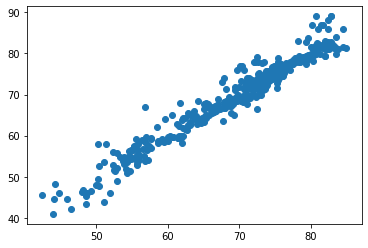

In [116]:
plt.scatter(predicted_values, y_test)
plt.show()

In [117]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 2.211 
MSE = 4.886836 
MAE = 1.5479617 
R2 = 0.9481848754898055 
Adjusted R2 = 0.9455879360752134


In [118]:
# Delete the end-point
predictor.delete_endpoint()

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**  
- **Retrain the XG-Boost algorithm with different hyperparameters** 
- **Report any improvement or degradation in results.**

In [ ]:
# Try different values and retrain the model